Statistical testing in time series data involves checking whether certain hypotheses about the data are true or false. There are various statistical tests that can be applied to time series data, including:

**Augmented Dickey-Fuller (ADF) test**: This test checks whether a time series is stationary or non-stationary. A stationary time series is one where the mean and variance are constant over time.

**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test**: This test checks for stationarity in a different way from the ADF test and is considered to be more robust.

**Granger causality test**: This test checks whether one time series is Granger-causal to another, meaning that past values of one series can be used to predict future values of another series.

**Pearson's correlation coefficient**: This test measures the strength and direction of a linear relationship between two time series.

**Spearman's rank correlation coefficient**: This test measures the strength and direction of a monotonic relationship between two time series.

**Cochran-Armitage trend test**: This test is used to test for a linear trend in the time series data.

**Mann-Kendall test**: This test is used to detect monotonic trends in time series data.

The choice of test will depend on the specific questions being asked about the data, and the assumptions and limitations of each test should be carefully considered.

It's also important to pre-process the data, such as detrending and removing seasonality, before applying statistical tests to ensure that the results are accurate and meaningful.

# 1. ADF

This code generates a random time series data, plots the data and performs an Augmented Dickey-Fuller test to determine if the time series is stationary or not.

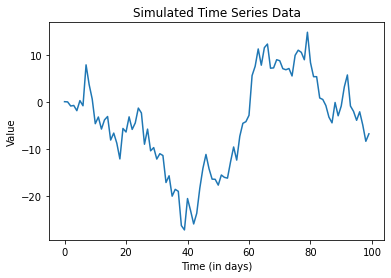

ADF Statistic: -1.687068
p-value: 0.437788
Critical Values:
	1%: -3.498
	5%: -2.891
	10%: -2.583
Time Series is Non-Stationary


In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the simulated time series data
np.random.seed(0)
#time_series = np.cumsum(np.random.randn(100))
time_series = 2*np.cumsum(np.random.randint(-1,2,100))- 3* np.cumsum(np.random.randn(100))
#time_series = np.array([4]*100) - np.random.randn(100)

# Plotting the time series data
plt.plot(time_series)
plt.title('Simulated Time Series Data')
plt.xlabel('Time (in days)')
plt.ylabel('Value')
plt.show()

# Performing a statistical test (Augmented Dickey-Fuller Test)
from statsmodels.tsa.stattools import adfuller

result = adfuller(time_series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] > result[4]['5%']:
    print('Time Series is Non-Stationary')
else:
    print('Time Series is Stationary')


In [139]:
import pandas as pd
import statsmodels.tsa.stattools as stattools

# Load the online available dataset into a pandas DataFrame
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [140]:
# Run the Augmented Dickey-Fuller test on the dataset
result = stattools.adfuller(df['Passengers'])

# Print the test statistic and p-value
print("Test Statistic: ", result[0])
print("p-value: ", result[1])

Test Statistic:  0.8153688792060552
p-value:  0.9918802434376411


If the p-value is less than a significance level (e.g., 0.05), we reject the null hypothesis that the time series is not stationary, and conclude that the time series is stationary.

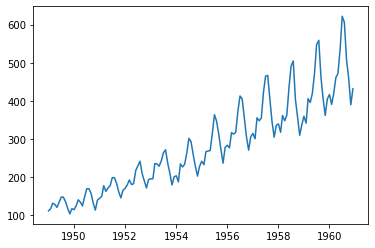

In [142]:
plt.plot(df['Passengers'])

# 2. Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

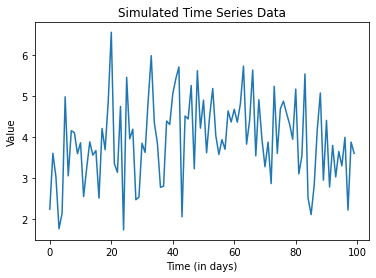

KPSS Statistic: 0.356480
p-value: 0.095914
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Time Series is Trend-Stationary


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the simulated time series data
np.random.seed(0)
#time_series = 2*np.cumsum(np.random.randint(-1,2,100)) - 4*np.cumsum(np.random.randn(100))
time_series = np.array([4]*100) - np.random.randn(100)


# Plotting the time series data
plt.plot(time_series)
plt.title('Simulated Time Series Data')
plt.xlabel('Time (in days)')
plt.ylabel('Value')
plt.show()

# Performing a statistical test (KPSS Test)
from statsmodels.tsa.stattools import kpss

result = kpss(time_series, regression='c')
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

if result[0] > result[3]['10%']:
    print('Time Series is Trend-Stationary')
else:
    print('Time Series is Stationary')

In [143]:
import pandas as pd
import statsmodels.tsa.stattools as stattools

# Load the online available dataset into a pandas DataFrame
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Run the Kwiatkowski-Phillips-Schmidt-Shin test on the dataset
result = stattools.kpss(df['Passengers'], regression='c')

# Print the test statistic and p-value
print("Test Statistic: ", result[0])
print("p-value: ", result[1])

Test Statistic:  1.6513122354165206
p-value:  0.01


C:\Users\Kevin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


If the p-value is greater than a significance level (e.g., 0.05), we fail to reject the null hypothesis that the time series is stationary, and conclude that the time series is stationary. If the p-value is less than the significance level, we reject the null hypothesis and conclude that the time series is not stationary

# 3. Granger causality test:

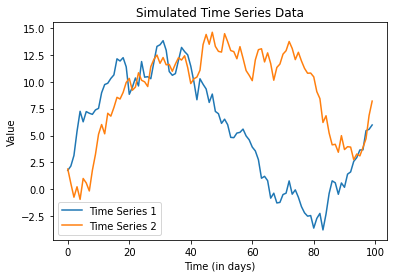

Granger Causality Test Results:
Lag: 1
p-value: 0.000
Time Series 2 Granger Causes Time Series 1

Lag: 2
p-value: 0.002
Time Series 2 Granger Causes Time Series 1



In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating the simulated time series data
np.random.seed(0)
time_series_1 = np.cumsum(np.random.randn(100))
time_series_2 = np.cumsum(np.random.randn(100))

# Plotting the time series data
plt.plot(time_series_1, label='Time Series 1')
plt.plot(time_series_2, label='Time Series 2')
plt.title('Simulated Time Series Data')
plt.xlabel('Time (in days)')
plt.ylabel('Value')
plt.legend()
plt.show()

# Performing a statistical test (Granger Causality Test)
from statsmodels.tsa.stattools import grangercausalitytests

time_series = pd.concat([pd.Series(time_series_1), pd.Series(time_series_2)], axis=1)
time_series.columns = ['Time Series 1', 'Time Series 2']

result = grangercausalitytests(time_series, maxlag=2, verbose=False)

print('Granger Causality Test Results:')
for lag, pvalue in result.items():
    print('Lag: %d' % lag)
    print('p-value: %.3f' % pvalue[0]['ssr_ftest'][1])
    if pvalue[0]['ssr_ftest'][1] < 0.05:
        print('Time Series 2 Granger Causes Time Series 1')
    else:
        print('Time Series 2 Does Not Granger Cause Time Series 1')
    print('')

For example, given a question: Could we use today's Apple's stock price to predict tomorrow's Tesla's stock price? If this is true, our statement will be Apple's stock price Granger causes Tesla's stock price. If this is not true, we say Apple's stock price does not Granger cause Tesla's stock price.

# 4. Pearson's correlation coefficient

Pearson's correlation coefficient: -0.26028605591587944


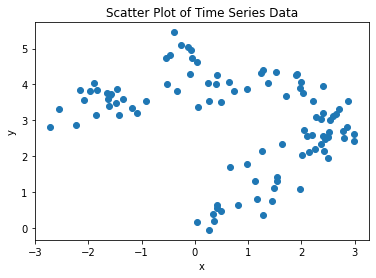

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating two simulated time series arrays
np.random.seed(0)
x = np.cumsum(np.random.rand(100) - 0.5)
y = np.cumsum(np.random.rand(100) - 0.5)

# Converting the arrays to Pandas dataframe
df = pd.DataFrame({'x': x, 'y': y})

# Calculating Pearson's correlation coefficient between the two time series
correlation = df['x'].corr(df['y'])

print("Pearson's correlation coefficient:", correlation)

# Plotting the time series data
plt.scatter(df['x'], df['y'])
plt.title('Scatter Plot of Time Series Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 5.  Spearman's rank correlation coefficient

In [87]:
import pandas as pd
import numpy as np

# Load the time series data as a Pandas dataframe
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, header=0)
df['Year']=df['Date'].apply(lambda x: int(x[:4]))
df['Month']=pd.DatetimeIndex(df['Date']).month
df.describe()

,Temp,Year,Month
count,3650.000000,3650.000000,3650.000000
mean,11.177753,1985.500000,6.520548
std,4.071837,2.872675,3.447566
min,0.000000,1981.000000,1.000000
25%,8.300000,1983.000000,4.000000
50%,11.000000,1985.500000,7.000000
75%,14.000000,1988.000000,10.000000
max,26.300000,1990.000000,12.000000


In [88]:
df.head()

,Date,Temp,Year,Month
0,1981-01-01,20.7,1981,1
1,1981-01-02,17.9,1981,1
2,1981-01-03,18.8,1981,1
3,1981-01-04,14.6,1981,1
4,1981-01-05,15.8,1981,1


In [89]:
# Calculating Spearman's rank correlation coefficient between the two time series
correlation = df['Temp'].corr(df['Year'], method='spearman')

print("Spearman's rank correlation coefficient:", correlation)

Spearman's rank correlation coefficient: 0.04324868214907908


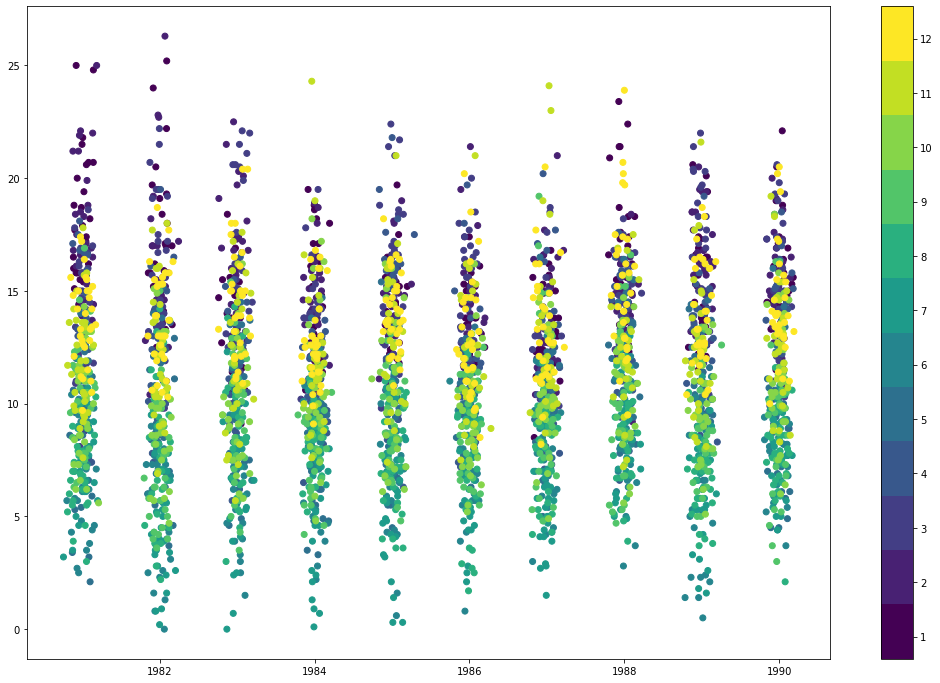

In [129]:
plt.figure(figsize=(18, 12))
n_clusters=12
cmap = plt.get_cmap('viridis', n_clusters)

# scatter points
scatter=plt.scatter(df['Year']+0.08*np.random.randn(len(df['Year'])), df['Temp'], c=df['Month'], cmap=cmap)

# add colorbar
cbar = plt.colorbar(scatter)

# set ticks locations (not very elegant, but it works):
# - shift by 0.5
# - scale so that the last value is at the center of the last color
tick_locs = (np.arange(1, n_clusters+1) + 0.5)*(n_clusters-1)/n_clusters
cbar.set_ticks(tick_locs)

# set tick labels (as before)
cbar.set_ticklabels(np.arange(1, n_clusters+1))

# 6. Cochran-Armitage trend test

In [131]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data set as a Pandas dataframe
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0)
df.columns=['Date', 'Passengers']
df['Month']=pd.DatetimeIndex(df['Date']).month
df.head()

,Date,Passengers,Month
0,1949-01,112,1
1,1949-02,118,2
2,1949-03,132,3
3,1949-04,129,4
4,1949-05,121,5


In [132]:
# Binning the data set into 5 groups based on passenger count
bins = [0, 50, 100, 150, 200, df['Passengers'].max()]
group_names = ['Low', 'Moderate', 'High', 'Very High', 'Extremely High']
df['Passenger Group'] = pd.cut(df['Passengers'], bins, labels=group_names, right=False)
df

,Date,Passengers,Month,Passenger Group
0,1949-01,112,1,High
1,1949-02,118,2,High
2,1949-03,132,3,High
3,1949-04,129,4,High
4,1949-05,121,5,High
...,...,...,...,...
139,1960-08,606,8,Extremely High
140,1960-09,508,9,Extremely High
141,1960-10,461,10,Extremely High
142,1960-11,390,11,Extremely High


<AxesSubplot:xlabel='Month', ylabel='Passengers'>

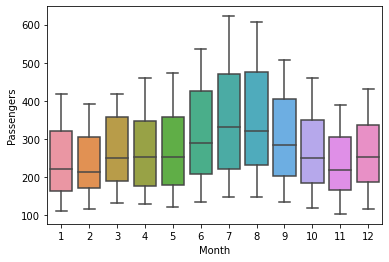

In [133]:
import seaborn as sns
sns.boxplot(data=df, x='Month', y='Passengers')

<AxesSubplot:xlabel='Passenger Group', ylabel='Passengers'>

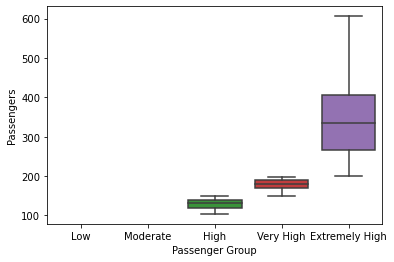

In [135]:
import seaborn as sns
sns.boxplot(data=df, x='Passenger Group', y='Passengers')

In [ ]:
# Conducting a contingency table analysis to determine the association between time and passenger group
contingency_table = pd.crosstab(df['Month'], df['Passenger Group'], margins=False)
contingency_table

In [75]:
# Performing the Cochran-Armitage trend test on the contingency table
_, p_value, _, _ = chi2_contingency(contingency_table, correction=False)

print("Cochran-Armitage trend test p-value:", p_value)

Cochran-Armitage trend test p-value: 0.9997208878845975


In this code, the airline passenger data set is loaded as a Pandas dataframe from a public URL. The passenger count data is then binned into 5 groups based on the passenger count and added as a new column in the dataframe. A contingency table analysis is conducted to determine the association between time (month) and passenger group. Finally, the Cochran-Armitage trend test is performed on the contingency table using the chi2_contingency

# 7. Mann-Kendall test

The Mann-Kendall test is a non-parametric statistical test used to determine if there is a monotonic upward or downward trend over time in a dataset.

# 8. Catatan

To perform various time series statistical analysis in Python, one can use libraries such as pandas, statsmodels, and scikit-learn.

With pandas, one can load, clean, manipulate and visualize time series data. It provides methods for moving window statistics such as rolling mean, rolling standard deviation, etc.

**Statsmodels** is a library for statistical analysis and econometric modeling. It has functions for performing time series analysis such as decomposition, ARIMA modeling, exponential smoothing, etc.

**Scikit-learn** is a machine learning library that provides functions for time series forecasting such as ARIMA, SARIMA, and SARIMAX models, exponential smoothing and more.

Additionally, one can also use visualization libraries such as matplotlib or seaborn to visualize the results of time series analysis.

**ARIMA** (AutoRegressive Integrated Moving Average) is a statistical model used for analyzing and forecasting time series data. It is a class of models that combines three components to account for time series characteristics such as seasonality, trend, and residual errors. The three components of ARIMA are:

AutoRegression (AR): A model that uses lagged values of the time series as predictors.

Integration (I): A model that accounts for the non-stationarity of the time series by taking the difference of the values to make it stationary.

Moving Average (MA): A model that uses the errors (residuals) from previous time steps to predict the value of the next time step.

The parameters of the ARIMA model (p, d, q) determine the number of lagged values to use in the AR component, the number of times to difference the data in the I component, and the number of errors to use in the MA component, respectively.

ARIMA modeling is a powerful tool for time series forecasting, especially when the data has a clear pattern or trend. It can be used for both univariate and multivariate time series data.

**Machine learning algorithms can be applied to time series data for various tasks such as forecasting, anomaly detection, and classification. Some commonly used algorithms for time series include:**

ARIMA (AutoRegressive Integrated Moving Average): A traditional time series method that models the time series as a combination of an autoregression (AR) component, a difference component (I), and a moving average (MA) component.

SARIMA (Seasonal ARIMA): An extension of ARIMA that includes a seasonal component to account for repeating patterns in the data.

Prophet: An open-source tool developed by Facebook that uses a Bayesian modeling approach to make forecasts.

Long Short-Term Memory (LSTM): A type of recurrent neural network that can be used to model time series data.

Random Forest: An ensemble learning method that can be used for time series forecasting by treating each time step as a separate feature.

Gradient Boosting: A machine learning technique that builds an ensemble of decision trees to make predictions. Can be applied to time series data by using previous values as input features.

In general, it is important to consider the temporal relationships in time series data when selecting a machine learning algorithm. This often involves transforming the data, such as difference or normalization, to stabilize the variance and make the series stationary. Additionally, time series models should be evaluated using appropriate metrics, such as mean absolute error (MAE), mean squared error (MSE), or root mean squared error (RMSE), to assess their performance in making accurate predictions.